<a href="https://colab.research.google.com/github/MilerDiazZevallos/Arequipa-Covid-19/blob/master/Sala_Situacional_Arequipa_MINSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Environment


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.optimize import curve_fit
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load Data from MINSA

In [2]:
import requests 

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [3]:
url_minsa = 'positivos_covid.csv'
download_url("https://www.datosabiertos.gob.pe/node/6447/download/"+url_minsa, url_minsa)

In [4]:
datos_minsa = pd.read_csv(url_minsa, encoding = "ISO-8859-1", sep=";")

# Análisis por días de contagio

In [5]:
datos_minsa

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210525,7320cabdc1aaca6c59014cae76a134e6,ICA,ICA,LA TINGUIÃA,PR,37.0,FEMENINO,20200923.0
1,20210525,e81602051997ace8340bb8c18fe24c65,ICA,ICA,LA TINGUIÃA,PR,49.0,FEMENINO,20200923.0
2,20210525,cecdbf10074dbc011ae05b3cbd320a6f,ICA,ICA,LA TINGUIÃA,PR,36.0,FEMENINO,20200922.0
3,20210525,71ecb6bccb248b0bb2ac72ed51b5e979,ICA,ICA,LA TINGUIÃA,PR,36.0,FEMENINO,20201022.0
4,20210525,566af4276cbe9359abe93f9aa86396c3,ICA,ICA,LA TINGUIÃA,PR,49.0,FEMENINO,20201026.0
...,...,...,...,...,...,...,...,...,...
1937240,20210525,7746ae489983aacbc94e163b9a9e432f,LIMA,LIMA,LINCE,AG,74.0,MASCULINO,20210211.0
1937241,20210525,6a87255a4acde85dedcef736352c866c,LIMA,LIMA,JESUS MARIA,AG,74.0,MASCULINO,20210212.0
1937242,20210525,f38c37cb8fbc6b2b11eee98ef84e5819,LIMA,LIMA,PUEBLO LIBRE,AG,72.0,MASCULINO,20210212.0
1937243,20210525,c687bce489eab61c7e02d95655a91fc0,LIMA,LIMA,SANTIAGO DE SURCO,AG,73.0,MASCULINO,20210213.0


In [6]:
# Si el archivo fue descargado ejecutar esta celda y comentar la tercera linea de la celda siguiente
########################################################################
datos_minsa.sort_values('FECHA_RESULTADO', inplace=True)
datos_minsa.dropna(inplace=True)
datos_minsa['FECHA_RESULTADO'] = datos_minsa['FECHA_RESULTADO'].astype(str)
datos_minsa.reset_index(drop=True, inplace=True)
datos_minsa['FECHA_RESULTADO'] = pd.to_datetime(datos_minsa['FECHA_RESULTADO'].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8]))

In [7]:
datos_minsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934877 entries, 0 to 1934876
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ï»¿FECHA_CORTE   int64         
 1   UUID             object        
 2   DEPARTAMENTO     object        
 3   PROVINCIA        object        
 4   DISTRITO         object        
 5   METODODX         object        
 6   EDAD             float64       
 7   SEXO             object        
 8   FECHA_RESULTADO  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 132.9+ MB


In [8]:
datos_minsa['EDAD'] = datos_minsa['EDAD'].fillna(0)
datos_minsa['EDAD'] = datos_minsa['EDAD'].astype('int')

datos_minsa['ï»¿FECHA_CORTE'] = datos_minsa['ï»¿FECHA_CORTE'].fillna(0)
datos_minsa['ï»¿FECHA_CORTE'] = datos_minsa['ï»¿FECHA_CORTE'].astype('int')
#datos_minsa['FECHA_RESULTADO'] = pd.to_datetime(datos_minsa['FECHA_RESULTADO'], dayfirst=True)

#datos_minsa = datos_minsa.apply(lambda x: x.str.upper() if x.dtype == "object" else x)  
datos_minsa['UUID'] = datos_minsa['UUID'].str.upper()
datos_minsa['DEPARTAMENTO'] = datos_minsa['DEPARTAMENTO'].str.upper()
datos_minsa['PROVINCIA'] = datos_minsa['PROVINCIA'].str.upper()
datos_minsa['DISTRITO'] = datos_minsa['DISTRITO'].str.upper()
datos_minsa['METODODX'] = datos_minsa['METODODX'].str.upper()
datos_minsa['SEXO'] = datos_minsa['SEXO'].str.upper()

In [9]:
display(datos_minsa.info())
display(datos_minsa.sort_values('FECHA_RESULTADO'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934877 entries, 0 to 1934876
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ï»¿FECHA_CORTE   int64         
 1   UUID             object        
 2   DEPARTAMENTO     object        
 3   PROVINCIA        object        
 4   DISTRITO         object        
 5   METODODX         object        
 6   EDAD             int64         
 7   SEXO             object        
 8   FECHA_RESULTADO  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 132.9+ MB


None

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210525,C400CACF4A449EB94B05DF22B452DB74,LIMA,LIMA,LA MOLINA,PCR,25,MASCULINO,2020-03-06
1,20210525,E21982B58575E778BC991C99595C0A8F,LIMA,LIMA,SANTIAGO DE SURCO,PCR,7,MASCULINO,2020-03-07
2,20210525,DCA15C9B97A33D88C426271AF3A91E16,LIMA,LIMA,SANTIAGO DE SURCO,PCR,74,FEMENINO,2020-03-07
3,20210525,6C59EF151819DDC81A55CAE01E850C2C,LIMA,LIMA,SANTIAGO DE SURCO,PCR,51,MASCULINO,2020-03-07
4,20210525,9E1630C857887091846DD1B08010BA96,LIMA,LIMA,SANTIAGO DE SURCO,PCR,25,MASCULINO,2020-03-07
...,...,...,...,...,...,...,...,...,...
1933327,20210525,302F4C8EB5A99C2CC33EE4A4E3EA0EAF,LIMA,LIMA,SAN BORJA,PCR,74,FEMENINO,2021-05-25
1933328,20210525,0AF8682BDABF6259EE8B2656269BCE96,LIMA,LIMA,COMAS,AG,35,FEMENINO,2021-05-25
1933329,20210525,220FB0F94EB801A8CFF7D24DA7973613,LIMA,LIMA,EL AGUSTINO,PR,29,MASCULINO,2021-05-25
1933349,20210525,A91C6CCB98A7A34848FE74CFE2908AB8,LIMA,LIMA,SAN MIGUEL,PCR,74,FEMENINO,2021-05-25


In [10]:
#datos_minsa_cut = datos_minsa.query('FECHA_RESULTADO >= \"2020-03-29\"')
datos_minsa_cut = datos_minsa.query('FECHA_RESULTADO >= \"2020-05-01\"')

In [11]:
datos_minsa_cut = datos_minsa_cut.reset_index(drop=True)
display(datos_minsa_cut.info())
display(datos_minsa_cut.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887062 entries, 0 to 1887061
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ï»¿FECHA_CORTE   int64         
 1   UUID             object        
 2   DEPARTAMENTO     object        
 3   PROVINCIA        object        
 4   DISTRITO         object        
 5   METODODX         object        
 6   EDAD             int64         
 7   SEXO             object        
 8   FECHA_RESULTADO  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 129.6+ MB


None

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
1887057,20210525,89FA87A024CA25A38A58A851C98CF6E6,AREQUIPA,AREQUIPA,AREQUIPA,AG,27,FEMENINO,2021-05-25
1887058,20210525,6E92DF9DE7B13FE4B784620663EB2632,JUNIN,CHUPACA,CHONGOS BAJO,PR,29,FEMENINO,2021-05-25
1887059,20210525,046CF267F1276E5FA9D6930218B3C0F8,ANCASH,SANTA,NUEVO CHIMBOTE,AG,31,FEMENINO,2021-05-25
1887060,20210525,2AE06B7AD9B6C620346FF9F53BE54E1C,LIMA,LIMA,SAN BORJA,AG,29,FEMENINO,2021-05-25
1887061,20210525,7E939321D875990A5494F6A7D55AB921,LIMA,LIMA,SAN JUAN DE MIRAFLORES,AG,36,MASCULINO,2021-05-25


In [12]:
display(datos_minsa_cut['FECHA_RESULTADO'].min())
display(datos_minsa_cut['FECHA_RESULTADO'].max())

Timestamp('2020-05-01 00:00:00')

Timestamp('2021-05-25 00:00:00')

In [13]:
df_arequipa_dep = datos_minsa_cut[datos_minsa_cut['DEPARTAMENTO'] == 'AREQUIPA']
df_arequipa_dep['WEEKDAY'] = df_arequipa_dep['FECHA_RESULTADO'].dt.weekday
df_arequipa_dep = df_arequipa_dep.reset_index(drop=True)
display(df_arequipa_dep.shape)
display(df_arequipa_dep.tail())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(81135, 10)

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,WEEKDAY
81130,20210525,B899802DCF39B658990DDFEB687025FD,AREQUIPA,AREQUIPA,CAYMA,AG,39,MASCULINO,2021-05-25,1
81131,20210525,43C0A09BB59107E25087D33504F48EC6,AREQUIPA,AREQUIPA,CERRO COLORADO,AG,40,FEMENINO,2021-05-25,1
81132,20210525,05261FB5C8CDF87127D4E3B82B40EB8C,AREQUIPA,CASTILLA,URACA,AG,14,MASCULINO,2021-05-25,1
81133,20210525,0B2F0CFD32A528C566B88F6B18A900C8,AREQUIPA,AREQUIPA,SABANDIA,AG,24,FEMENINO,2021-05-25,1
81134,20210525,89FA87A024CA25A38A58A851C98CF6E6,AREQUIPA,AREQUIPA,AREQUIPA,AG,27,FEMENINO,2021-05-25,1


PROVINCIA          SEXO     
AREQUIPA           MASCULINO    35040
                   FEMENINO     31535
CAYLLOMA           MASCULINO     1819
                   FEMENINO      1816
ISLAY              MASCULINO     1540
                   FEMENINO      1445
CAMANA             MASCULINO     1439
                   FEMENINO      1409
CARAVELI           MASCULINO     1139
                   FEMENINO      1040
CASTILLA           FEMENINO       771
                   MASCULINO      750
CONDESUYOS         MASCULINO      401
                   FEMENINO       270
LA UNION           MASCULINO      183
EN INVESTIGACIÃN  FEMENINO       182
LA UNION           FEMENINO       179
EN INVESTIGACIÃN  MASCULINO      177
Name: UUID, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


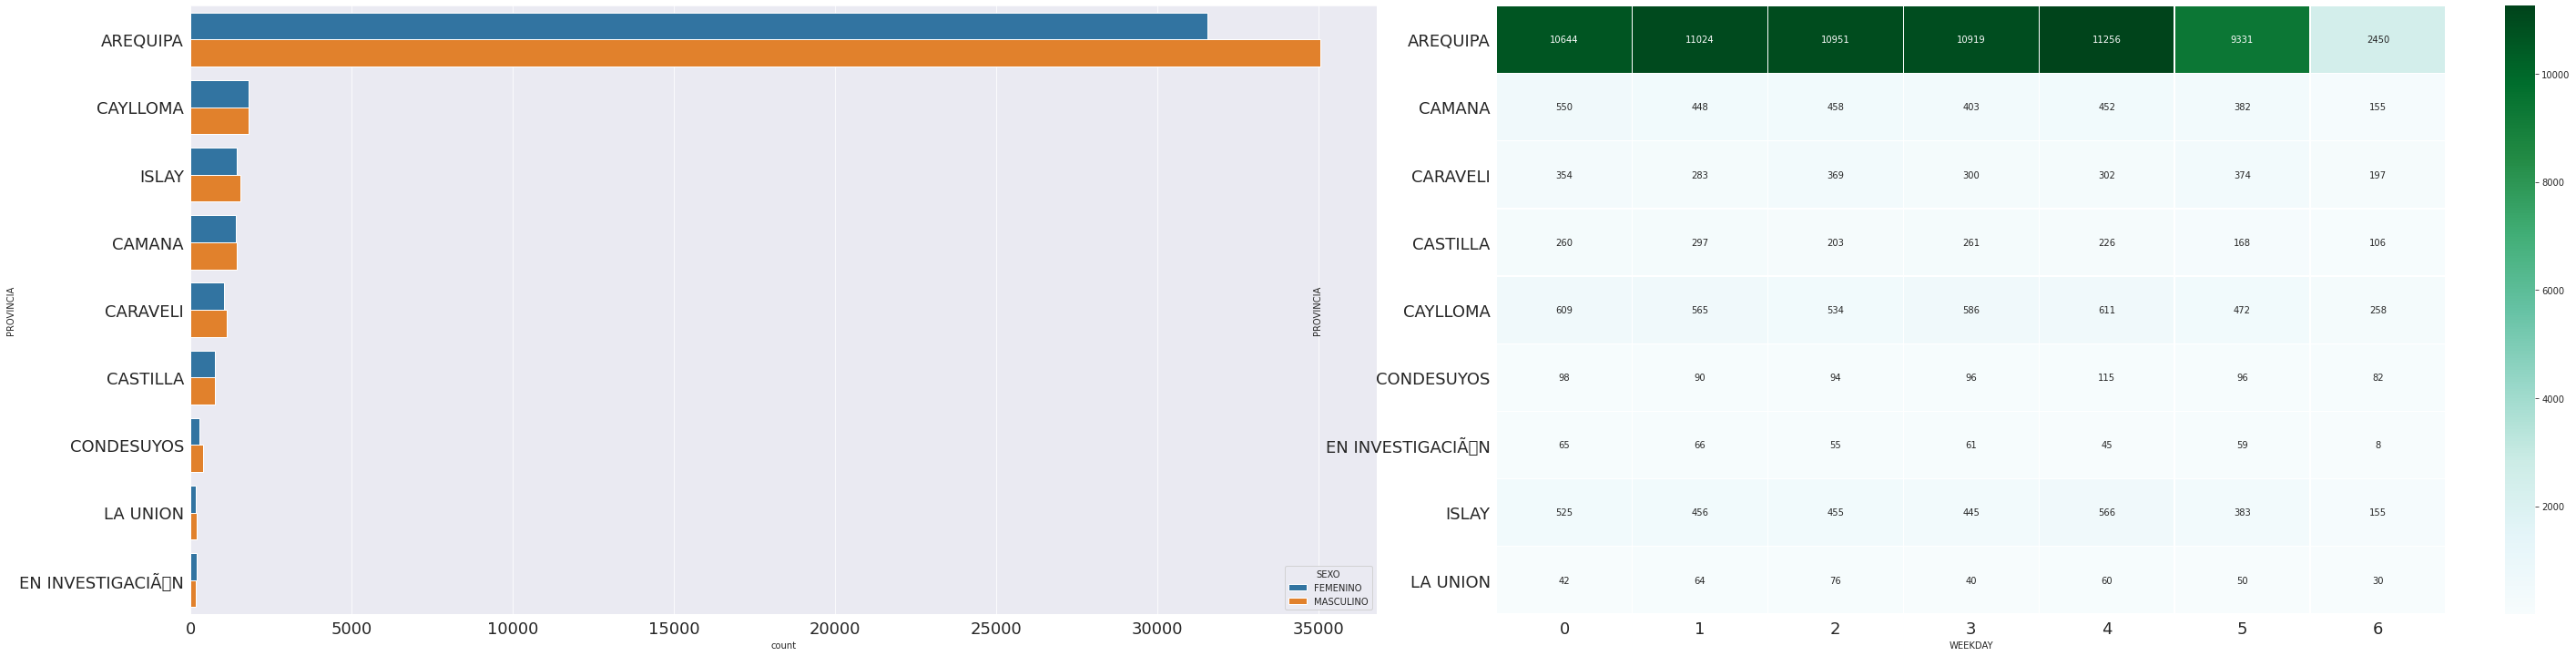

In [14]:
pd_arequipa_dep_crosstab = pd.crosstab(df_arequipa_dep["PROVINCIA"], df_arequipa_dep["WEEKDAY"])

display(df_arequipa_dep.groupby(['PROVINCIA', 'SEXO'])['UUID'].count().sort_values(ascending=False))

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(40,10))

sns.countplot(data=df_arequipa_dep, y='PROVINCIA', order = df_arequipa_dep['PROVINCIA'].value_counts().index, hue='SEXO', ax = ax1)
sns.heatmap(pd_arequipa_dep_crosstab, cmap="BuGn", linewidths=0.3, annot=True, fmt="d", ax = ax2)
fig.tight_layout()
ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)

plt.show()

In [15]:
df_arequipa_pro = datos_minsa_cut[(datos_minsa_cut['DEPARTAMENTO'] == 'AREQUIPA') & (datos_minsa_cut['PROVINCIA'] == 'AREQUIPA')].reset_index(drop=True)
df_arequipa_pro['WEEKDAY'] = df_arequipa_pro['FECHA_RESULTADO'].dt.weekday
display(df_arequipa_pro.shape)
display(df_arequipa_pro.tail())

(66575, 10)

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,WEEKDAY
66570,20210525,38511650F9199F647FE23EF85EC89F18,AREQUIPA,AREQUIPA,TIABAYA,AG,58,FEMENINO,2021-05-25,1
66571,20210525,B899802DCF39B658990DDFEB687025FD,AREQUIPA,AREQUIPA,CAYMA,AG,39,MASCULINO,2021-05-25,1
66572,20210525,43C0A09BB59107E25087D33504F48EC6,AREQUIPA,AREQUIPA,CERRO COLORADO,AG,40,FEMENINO,2021-05-25,1
66573,20210525,0B2F0CFD32A528C566B88F6B18A900C8,AREQUIPA,AREQUIPA,SABANDIA,AG,24,FEMENINO,2021-05-25,1
66574,20210525,89FA87A024CA25A38A58A851C98CF6E6,AREQUIPA,AREQUIPA,AREQUIPA,AG,27,FEMENINO,2021-05-25,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)


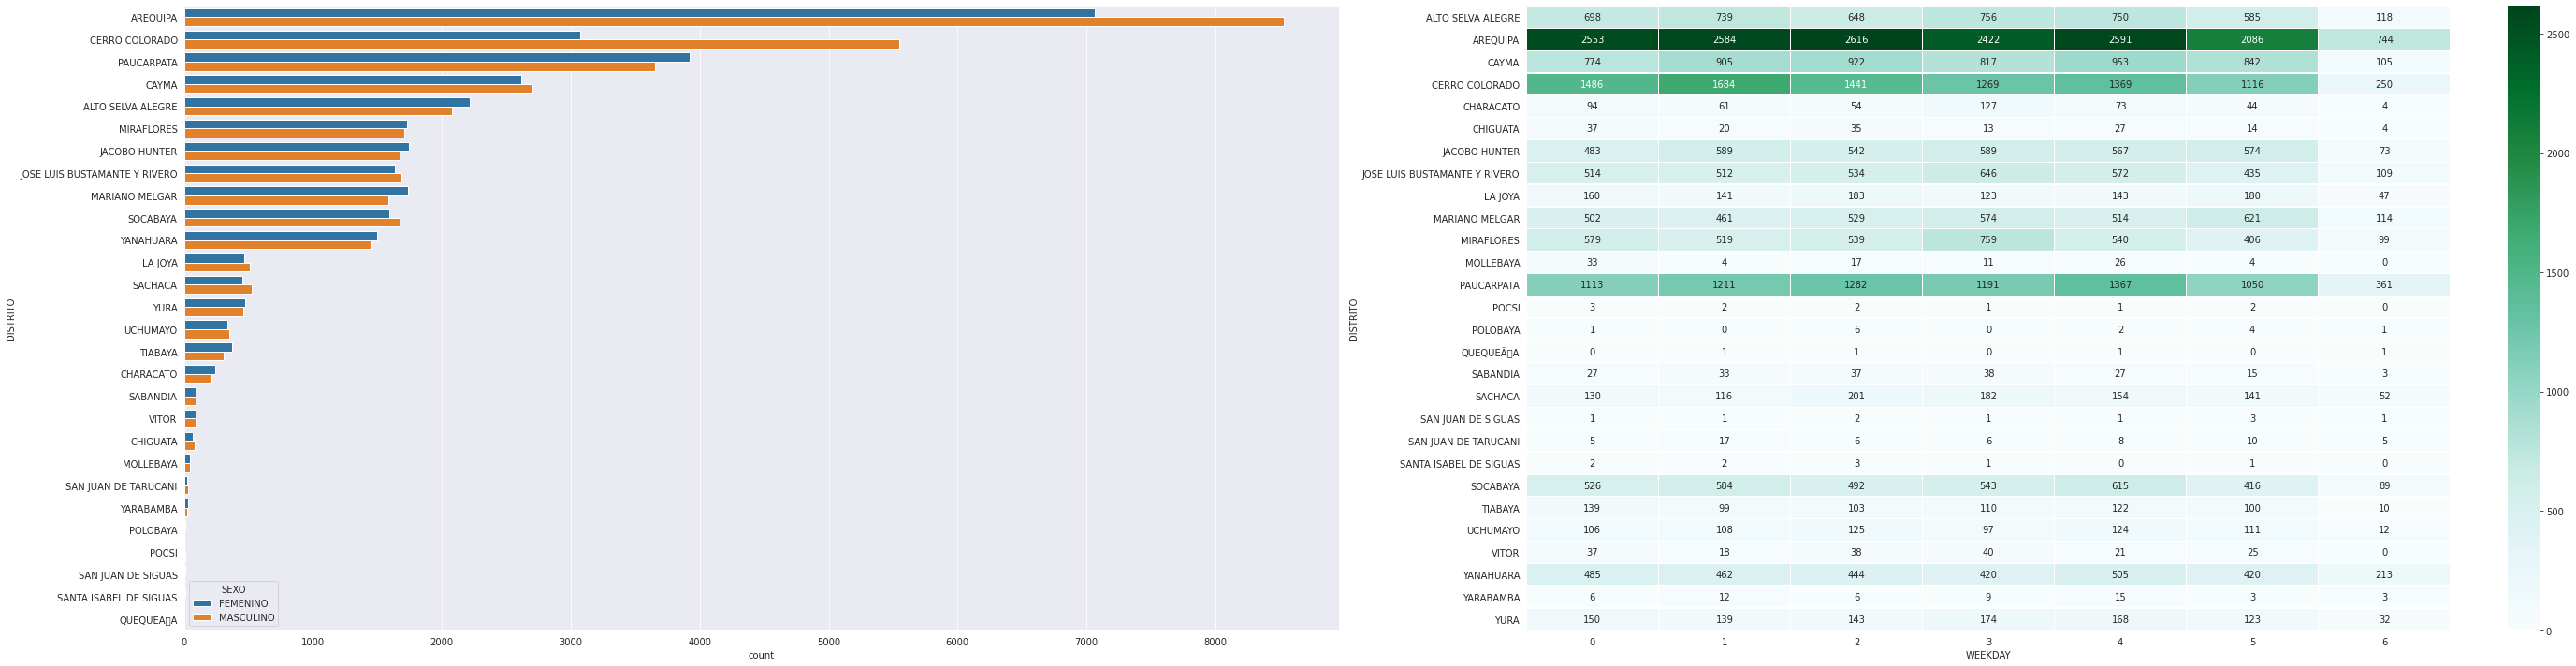

In [16]:
pd_arequipa_pro_crosstab = pd.crosstab(df_arequipa_pro["DISTRITO"], df_arequipa_pro["WEEKDAY"])

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(40,10))

sns.countplot(data=df_arequipa_pro, y='DISTRITO', order = df_arequipa_pro['DISTRITO'].value_counts().index, hue = 'SEXO', ax = ax1)
sns.heatmap(pd_arequipa_pro_crosstab, cmap="BuGn", linewidths=0.3, annot=True, fmt="d", ax = ax2)
fig.tight_layout()

plt.show()

In [17]:
df_arequipa_pro

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,WEEKDAY
0,20210525,0F840C9DB7AF143B4BEBFF6F7EE1AE46,AREQUIPA,AREQUIPA,CAYMA,PR,28,FEMENINO,2020-05-01,4
1,20210525,FD2634F40C1C7DB7C2AE37C362440697,AREQUIPA,AREQUIPA,SACHACA,PR,33,MASCULINO,2020-05-01,4
2,20210525,3F022A9F6F18E9747D6D9058D13B9DBA,AREQUIPA,AREQUIPA,SOCABAYA,PR,39,MASCULINO,2020-05-01,4
3,20210525,4BB4AE758A690248C74F5CC67A8B713B,AREQUIPA,AREQUIPA,AREQUIPA,PR,61,MASCULINO,2020-05-01,4
4,20210525,0F72AAC32483FF09871175E11FF598A8,AREQUIPA,AREQUIPA,SACHACA,PR,24,FEMENINO,2020-05-01,4
...,...,...,...,...,...,...,...,...,...,...
66570,20210525,38511650F9199F647FE23EF85EC89F18,AREQUIPA,AREQUIPA,TIABAYA,AG,58,FEMENINO,2021-05-25,1
66571,20210525,B899802DCF39B658990DDFEB687025FD,AREQUIPA,AREQUIPA,CAYMA,AG,39,MASCULINO,2021-05-25,1
66572,20210525,43C0A09BB59107E25087D33504F48EC6,AREQUIPA,AREQUIPA,CERRO COLORADO,AG,40,FEMENINO,2021-05-25,1
66573,20210525,0B2F0CFD32A528C566B88F6B18A900C8,AREQUIPA,AREQUIPA,SABANDIA,AG,24,FEMENINO,2021-05-25,1


# Análisis por etapas y edad de las personas

In [18]:
df_arequipa_pro['ETAPA'] = df_arequipa_pro['EDAD'].apply(lambda x: 
                              'INFANCIA(0-6)' if x <= 6 
                              else 'NIÑEZ(7-12)' if x <= 12 
                              else 'ADOLESCENCIA(13-20)' if x <= 20
                              else 'JUVENTUD(21-25)' if x <= 25
                              #else 'ADULTEZ_JOVEN' if x <= 40
                              #else 'ADULTEZ_INTERMEDIA' if x <= 50
                              #else 'ADULTEZ_TARDIA' if x <= 60 
                              else 'ADULTEZ(26-60)' if x <= 60 
                              else 'ANCIANIDAD(60+)') 

In [19]:
df_etapas = df_arequipa_pro.groupby(['ETAPA', 'FECHA_RESULTADO']).size().reset_index().pivot(columns='ETAPA', index='FECHA_RESULTADO', values=0)
df_etapas.fillna(0, inplace=True)
df_etapas = df_etapas[['INFANCIA(0-6)', 'NIÑEZ(7-12)', 'ADOLESCENCIA(13-20)', 'JUVENTUD(21-25)', 'ADULTEZ(26-60)', 'ANCIANIDAD(60+)']]
df_etapas

ETAPA,INFANCIA(0-6),NIÑEZ(7-12),ADOLESCENCIA(13-20),JUVENTUD(21-25),ADULTEZ(26-60),ANCIANIDAD(60+)
FECHA_RESULTADO,,,,,,
2020-05-01,0.0,1.0,0.0,2.0,31.0,4.0
2020-05-02,0.0,0.0,0.0,1.0,23.0,5.0
2020-05-03,0.0,0.0,0.0,0.0,4.0,3.0
2020-05-04,2.0,1.0,1.0,10.0,38.0,4.0
2020-05-05,0.0,0.0,0.0,2.0,44.0,7.0
...,...,...,...,...,...,...
2021-05-21,3.0,4.0,27.0,39.0,266.0,49.0
2021-05-22,1.0,1.0,24.0,25.0,226.0,54.0
2021-05-23,1.0,1.0,3.0,4.0,18.0,8.0


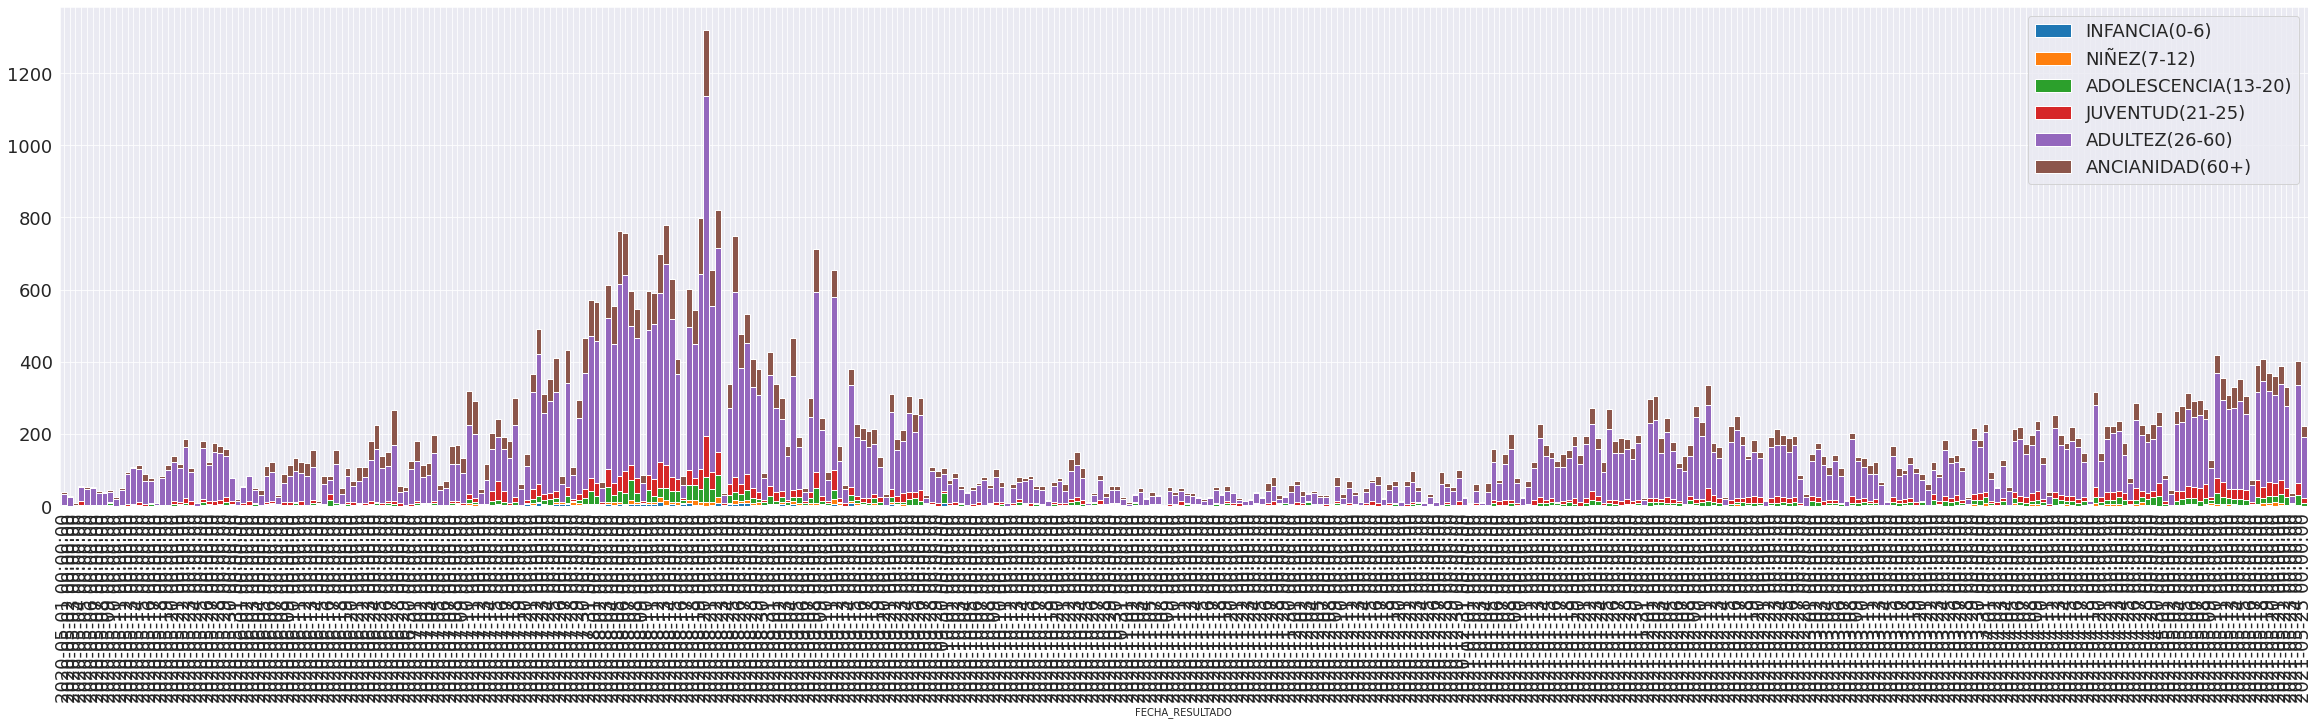

In [20]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(32,9))

df_etapas.plot(kind='bar', stacked=True, width=1, ax=ax1)
ax1.legend(fontsize=18)
fig.tight_layout()
ax1.tick_params(labelsize=18)
#ax1.set_xlim([pd.to_datetime('2020-10-01'),None])

plt.savefig('MINSA_EdadFranjas.pdf')
plt.show()

In [21]:
df_plot = df_etapas.copy()
df_plot['SUM'] = df_plot.sum(axis=1)

df_plot['INFANCIA(0-6)'] = df_plot['INFANCIA(0-6)'] / df_plot['SUM']
df_plot['NIÑEZ(7-12)'] = df_plot['NIÑEZ(7-12)'] / df_plot['SUM']
df_plot['ADOLESCENCIA(13-20)'] = df_plot['ADOLESCENCIA(13-20)'] / df_plot['SUM']
#df_plot['ADULTEZ_INTERMEDIA'] = df_plot['ADULTEZ_INTERMEDIA'] / df_plot['SUM']
#df_plot['ADULTEZ_JOVEN'] = df_plot['ADULTEZ_JOVEN'] / df_plot['SUM']
#df_plot['ADULTEZ_TARDIA'] = df_plot['ADULTEZ_TARDIA'] / df_plot['SUM']
df_plot['JUVENTUD(21-25)'] = df_plot['JUVENTUD(21-25)'] / df_plot['SUM']
df_plot['ADULTEZ(26-60)'] = df_plot['ADULTEZ(26-60)'] / df_plot['SUM']
df_plot['ANCIANIDAD(60+)'] = df_plot['ANCIANIDAD(60+)'] / df_plot['SUM']
del df_plot['SUM']
df_plot

ETAPA,INFANCIA(0-6),NIÑEZ(7-12),ADOLESCENCIA(13-20),JUVENTUD(21-25),ADULTEZ(26-60),ANCIANIDAD(60+)
FECHA_RESULTADO,,,,,,
2020-05-01,0.000000,0.026316,0.000000,0.052632,0.815789,0.105263
2020-05-02,0.000000,0.000000,0.000000,0.034483,0.793103,0.172414
2020-05-03,0.000000,0.000000,0.000000,0.000000,0.571429,0.428571
2020-05-04,0.035714,0.017857,0.017857,0.178571,0.678571,0.071429
2020-05-05,0.000000,0.000000,0.000000,0.037736,0.830189,0.132075
...,...,...,...,...,...,...
2021-05-21,0.007732,0.010309,0.069588,0.100515,0.685567,0.126289
2021-05-22,0.003021,0.003021,0.072508,0.075529,0.682779,0.163142
2021-05-23,0.028571,0.028571,0.085714,0.114286,0.514286,0.228571


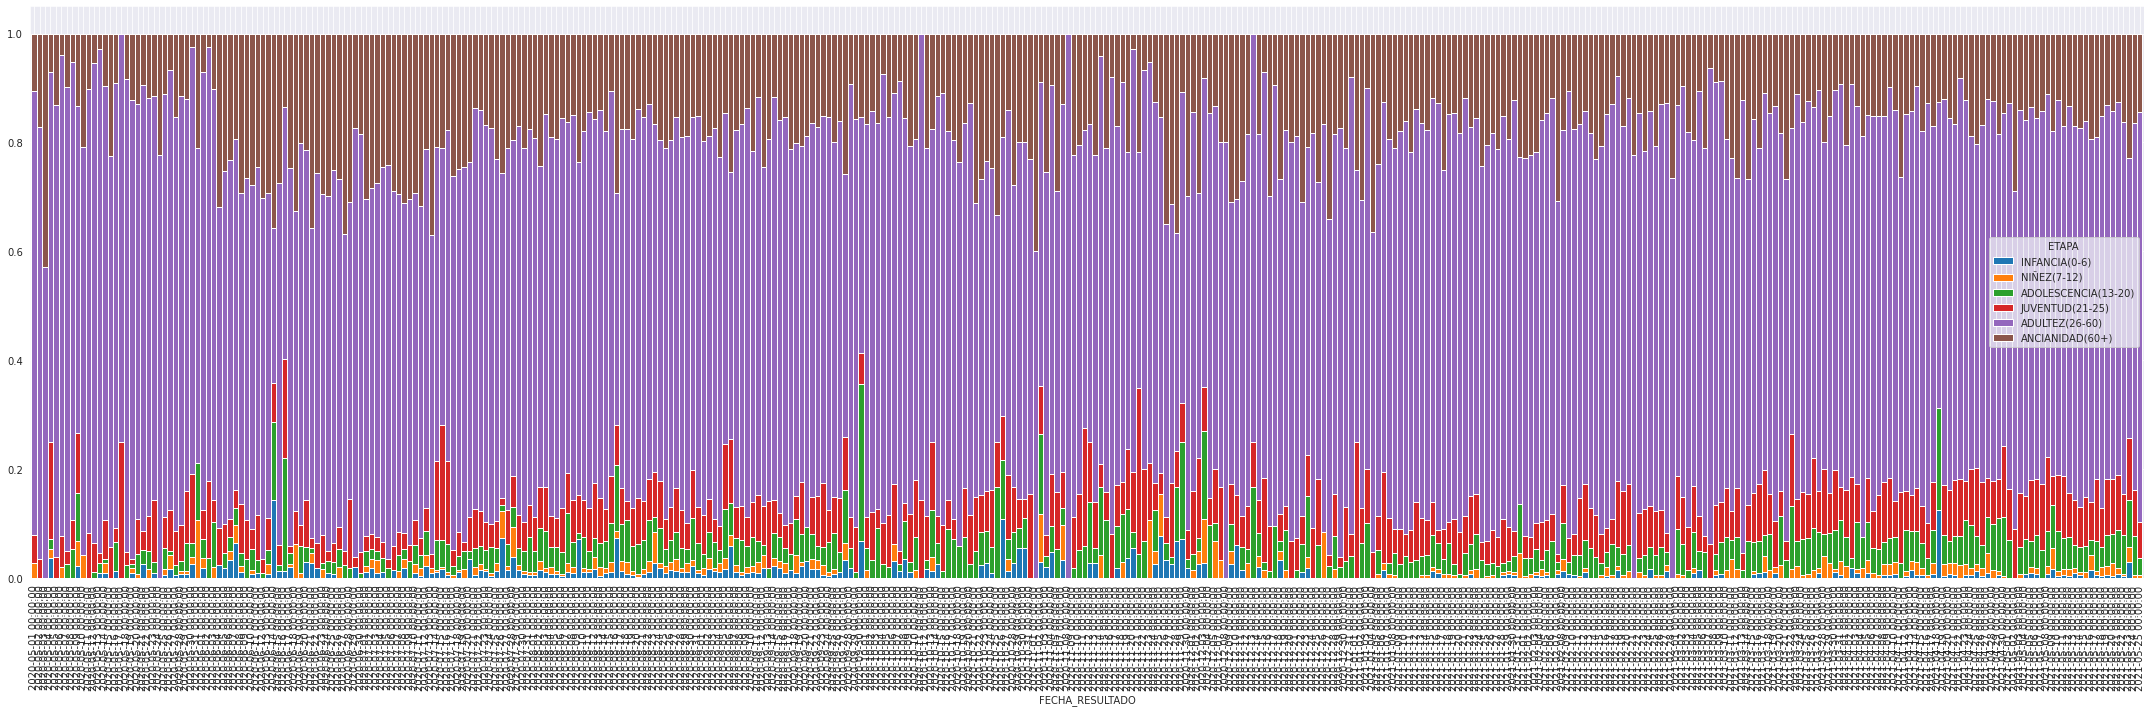

In [22]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30,10))

df_plot.plot(kind='bar', stacked=True, width=1, ax=ax1)
fig.tight_layout()

plt.show()

In [23]:
df_edad = df_arequipa_pro.EDAD
#df_edad.replace([0], np.nan, inplace=True)
display(df_edad.value_counts().sort_index().shape)
df_edad.describe()

(106,)

count    66575.000000
mean        43.779572
std         17.077764
min          0.000000
25%         31.000000
50%         42.000000
75%         55.000000
max        119.000000
Name: EDAD, dtype: float64

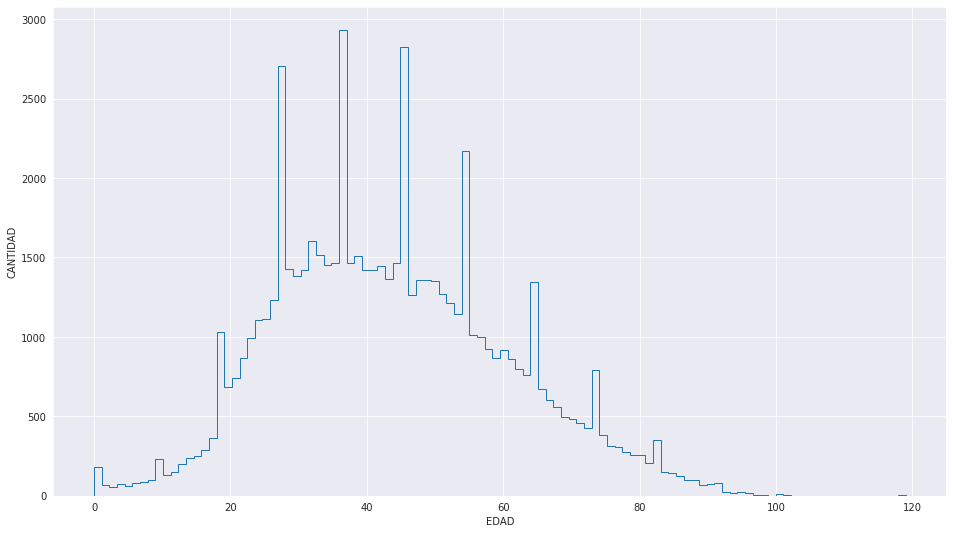

In [24]:
plt.figure(figsize=(16,9))
plt.hist(df_edad.dropna(), bins=106, histtype='step')
plt.xlabel('EDAD')
plt.ylabel('CANTIDAD')
plt.show()

In [25]:
is_masculine = df_arequipa_pro.SEXO == 'MASCULINO'
is_PCR = df_arequipa_pro.METODODX == 'PCR'
edad_sex_masculine = df_edad[is_masculine]
edad_sex_femenine = df_edad[~is_masculine]
print('Promedio de Edad Hombres: ', edad_sex_masculine.mean())
print('Promedio de Edad Mujeres: ',edad_sex_femenine.mean())

edad_sex_masculine_pcr = df_edad[is_masculine & is_PCR]
edad_sex_femenine_pcr = df_edad[~is_masculine & is_PCR]
print('Promedio de Edad Hombres - PCR: ',edad_sex_masculine_pcr.mean())
print('Promedio de Edad Mujeres - PCR: ',edad_sex_femenine_pcr.mean())

Promedio de Edad Hombres:  43.93284817351598
Promedio de Edad Mujeres:  43.60925955287775
Promedio de Edad Hombres - PCR:  45.02275576125735
Promedio de Edad Mujeres - PCR:  46.39382573571841
